接口说明：
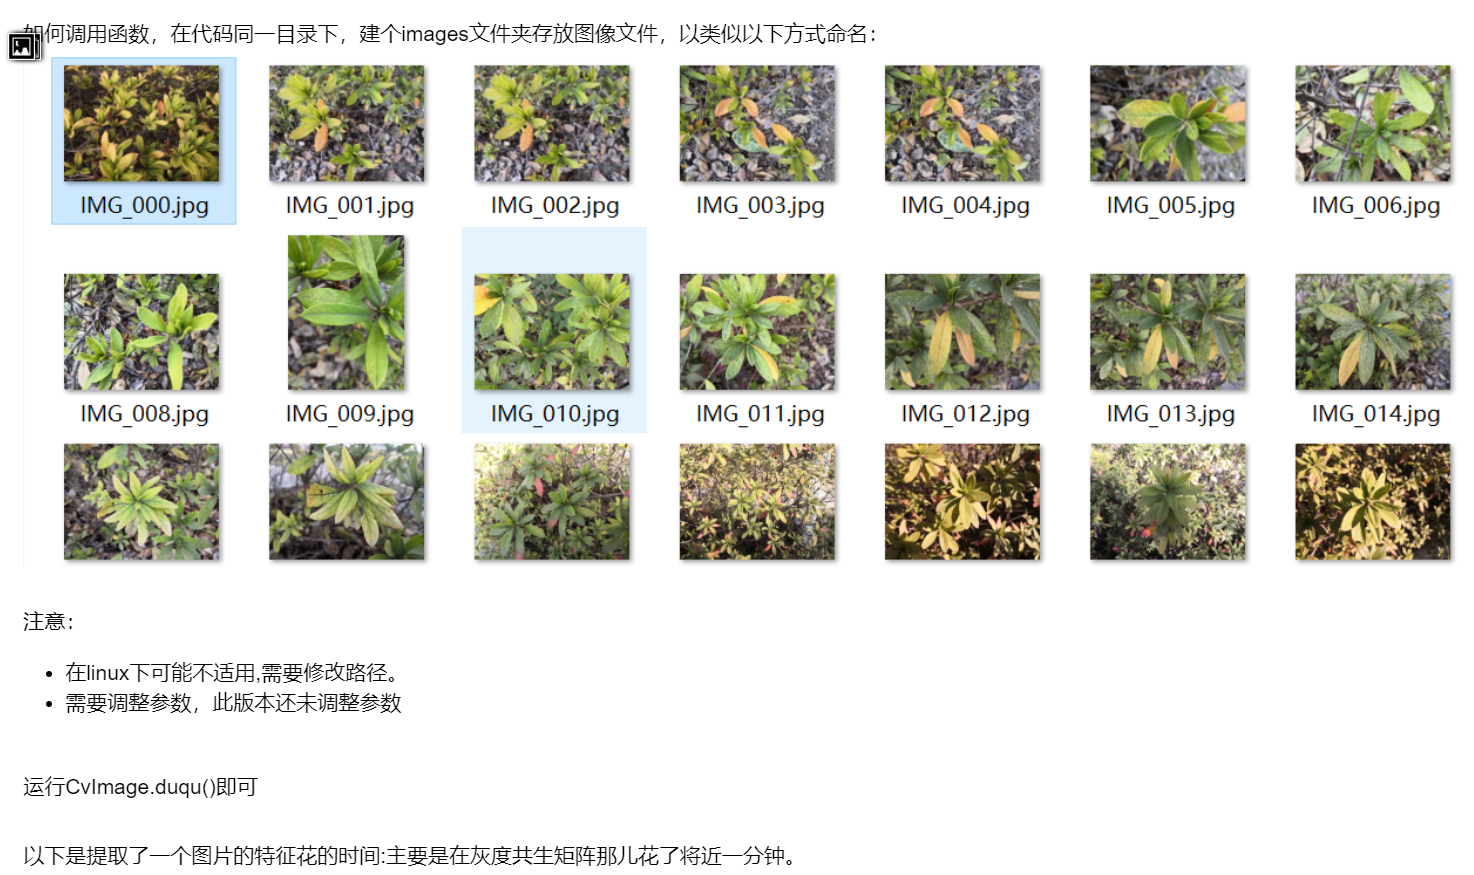

# 以下代码命名为"CvImage.py"，和images文件夹，自己写的代码放在同一目录下：

In [2]:
"""
Created on Sat Jan 23 11:31 2021
@author: xiaotingting
"""
import time, timeit
import math
from matplotlib import pyplot as plt
import cv2
import numpy as np
import os
import pandas as pd

__all__=['CvImage']
def clock(func):
    def clocked(*args):
        t0 = timeit.default_timer()
        result = func(*args)
        elapsed = timeit.default_timer() - t0
        name = func.__name__
        arg_str = ', '.join(repr(arg) for arg in args)
        print('[%0.8fs] %s(%s) -> %r' % (elapsed, name, arg_str, result))
        return result

    return clocked


def whole_hist(func):
    def whole_histed(*args):
        '''
        绘制整幅图像的直方图
        '''
        image = func(*args)
        plt.hist(image.ravel(), 256, [0, 256])  # numpy的ravel函数功能是将多维数组降为一维数组
        plt.show()
        return image

    return whole_histed


def show_img(func):
    def show_image(*args):
        image = func(*args)

        cv2.imshow('dst', image)
        if cv2.waitKey(0) & 0xff == 27:
            cv2.destroyAllWindows()
        return image

    return show_image


# def channel_hist(func):
#     def channel_histed(*args,**dicts):
#         '''
#         画三通道图像的直方图,出现了一个问题：写一个装饰器画三通道直方图，发现画一个通道是可以的，但是画三个就不允许了。指在一张图中绘制多条曲线，相同坐标轴。
#         '''
#         image=func(*args)
#         #print(image)
#         color = ('b', 'g', 'r')   #这里画笔颜色的值可以为大写或小写或只写首字母或大小写混合
#         hist=[1,2,3,4]
#         #for i1 , color1 in enumerate(color):
#         for i1 in range(3):
#             #enumerate()将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中
#             hist[i1] = cv2.calcHist([image], [i1], None, [256], [0, 256])  #计算直方图
#             #plt.plot(hist, color1)
# # 创建figure对象
#             fig = plt.figure() # 每调用一次plt.figure()函数就会创建一个新的显示窗口，与matlab中的figure类似
#             subplot = fig.add_subplot(2, 3, 1) # 2表示2行，3表示3列，1表示2行3列中的索引位置1
#             #subplot.xlim([0, 256])
#             subplot.imshow(hist[0])

#             subplot = fig.add_subplot(2, 3, 3) # 2表示2行，3表示3列，1表示2行3列中的索引位置3
#             #subplot.xlim([0, 256])
#             subplot.imshow(hist[1])

#             subplot = fig.add_subplot(2, 3, 6) # 2表示2行，3表示3列，1表示2行3列中的索引位置6
#             #subplot.xlim([0, 256])
#             subplot.imshow(hist[2])
#         return image
#     return channel_histed

class CvImage():
    def __init__(self, img_name, read_method=1, gray_method=3, fx=0.3, fy=0.3, num=1, gray_level=16):
        self.img_name = img_name
        self.read_method = read_method
        self.gray_method = gray_method
        self.fx = fx
        self.fy = fy
        self.img = self.load_image()
        self.ju = ["ju1", "ju2", "ju3", "ju4", "ju5", "ju6", "ju7", 'huidu1', 'huidu2', 'huidu3', 'huidu4', 'yanse1',
                   'yanse2', 'yanse3', 'yanse4', 'yanse5', 'yanse6', 'yanse7', 'yanse8', 'yanse9']  # 将列表a，b转换成字典
        self.data = pd.DataFrame(columns=self.ju)
        self.num = num
        self.gray_level = gray_level

    def load_image(self):
        pt = (os.getcwd() + '\\images\\' + self.img_name)
        img = cv2.imread(pt, self.read_method)
        #         if img is None:
        #             raise Exception("Image is not found!", pt)
        #         return img
        return img

    def xiugai_chicun(self):
        img = self.img
        image = cv2.resize(img, dsize=None, fx=self.fx, fy=self.fy, interpolation=cv2.INTER_AREA)
        self.img = image
        return image

    def image_to_gray1(self):
        img = self.img
        grayimg = np.zeros(img.shape, np.uint8)
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                grayimg[i, j] = max(image[i, j][0], image[i, j][1], image[i, j][2])
        return grayimg

    def image_to_gray2(self):
        image = self.img
        # 最大值法
        h, w = image.shape[:2]
        grayimg = np.zeros((h, w), dtype=np.uint8)  # 创建一个h行w列的二维list
        for i in range(h):
            for j in range(w):
                grayimg[i, j] = (int(image[i, j][0]) + int(image[i, j][1]) + int(image[i, j][2])) / 3
        return grayimg

    def image_to_gray3(self):
        image = self.img
        h, w = image.shape[:2]
        grayimg = np.zeros((h, w), dtype=np.uint8)  # 创建一个h行w列的二维list
        for i in range(h):
            for j in range(w):
                # Y = 0．3R + 0．59G + 0．11B
                # 通过cv格式打开的图片，像素格式为 BGR
                grayimg[i, j] = 0.3 * image[i, j][2] + 0.11 * image[i, j][0] + 0.59 * image[i, j][1]
        return grayimg

    #     @whole_hist
    #     @show_img
    def zhongzhi_lvbo(self):
        img = self.img
        img = cv2.medianBlur(img, 5)
        return img

    def image_to_gray(self):
        if self.gray_method in range(1, 4):
            if self.gray_method == 1:
                return self.image_to_gray1()
            elif self.gray_method == 2:
                return self.image_to_gray2()
            elif self.gray_method == 3:
                return self.image_to_gray2()
        else:
            raise Exception("Gray_method is not in 1,2,3!", gray_method)
    @show_img
    def zhifangtu_junhen(self):
        img = self.zhongzhi_lvbo()

        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        cl1 = clahe.apply(img)
        return cl1

    #     @show_img
    def quchu_beijing(self):
        img = self.zhongzhi_lvbo()  #################3
        HSV_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        hue = HSV_img[:, :, 0]
        lower_gray = np.array([1, 0, 0])
        upper_gray = np.array([99, 255, 255])  # 这就是双阈值
        mask = cv2.inRange(HSV_img, lower_gray, upper_gray)
        # Bitwise-AND mask and original image
        res2 = cv2.bitwise_and(img, img, mask=mask)  # 和模板进行与运算
        cv2.imwrite("res2.jpg", res2)
        self.img = res2
        return res2

    #     @show_img
    def bianyuan_chuli(self):
        self.quchu_beijing()
        res2 = cv2.cvtColor(self.img, cv2.COLOR_BGR2HSV)
        ret1, thresh1 = cv2.threshold(res2, 0, 255, cv2.THRESH_BINARY)
        cv2.imwrite("mask.jpg", thresh1)
        kernel = np.ones((10, 10), np.uint8)  # 矩形结构

        erosion = cv2.erode(thresh1, kernel)  # 腐蚀
        dilation = cv2.dilate(thresh1, kernel)  # 膨胀

        kernel_1 = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))
        opening = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel_1)

        closing = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel_1)
        cv2.imwrite("biyunsuan.jpg", closing)
        (B, G, R) = cv2.split(self.img)
        mask = cv2.cvtColor(closing, cv2.COLOR_BGR2GRAY)
        and_img_B = cv2.bitwise_and(B, mask)
        and_img_G = cv2.bitwise_and(G, mask)
        and_img_R = cv2.bitwise_and(R, mask)
        zeros = np.zeros(res2.shape[:2], np.uint8)
        #         img_RGB=cv2.bitwise_and(closing,self.img)
        img_RGB = cv2.merge([and_img_R, and_img_G, and_img_B])
        cv2.imwrite("not_bad_segemation.jpg", img_RGB)
        img_BGR = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2BGR)  # 这个颜色空间转来转去的，要小心
        HSV_img = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2HSV)
        hue = HSV_img[:, :, 0]

        lower_gray = np.array([1, 0, 0])
        upper_gray = np.array([99, 255, 255])

        mask = cv2.inRange(HSV_img, lower_gray, upper_gray)
        # Bitwise-AND mask and original image
        result = cv2.bitwise_and(img_BGR, img_BGR, mask=mask)
        self.img = result
        return result

    def luokuo_fenge(self):
        gray = self.zhongzhi_lvbo()
        gray = np.float32(gray)
        dst = cv2.cornerHarris(gray, 2, 3, 0.04)
        dst = cv2.dilate(dst, None)
        ret, dst = cv2.threshold(dst, 0.01 * dst.max(), 255, 0)
        dst = np.uint8(dst)
        # find centroids
        # connectedComponentsWithStats(InputArray image, OutputArray labels, OutputArray stats,
        # OutputArray centroids, int connectivity=8, int ltype=CV_32S)
        ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
        # define the criteria to stop and refine the corners
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
        # Python: cv2.cornerSubPix(image, corners, winSize, zeroZone, criteria)
        # zeroZone – Half of the size of the dead region in the middle of the search zone
        # over which the summation in the formula below is not done. It is used sometimes
        # to avoid possible singularities of the autocorrelation matrix. The value of (-1,-1)
        # indicates that there is no such a size.
        # 返回值由角点坐标组成的一个数组（而非图像）
        corners = cv2.cornerSubPix(gray, np.float32(centroids), (5, 5), (-1, -1), criteria)
        # Now draw them
        res = np.hstack((centroids, corners))
        # np.int0 可以用来省略小数点后面的数字（非四㮼五入）。
        res = np.int0(res)
        img[res[:, 1], res[:, 0]] = [0, 0, 255]
        img[res[:, 3], res[:, 2]] = [0, 255, 0]
        cv2.imwrite('subpixel5.png', img)
        return img

    def bubianju(self):
        seg = self.bianyuan_chuli()
        seg_gray = cv2.cvtColor(seg, cv2.COLOR_BGR2GRAY)
        moments = cv2.moments(seg_gray)
        humoments = cv2.HuMoments(moments)
        humoments = np.log(np.abs(humoments))  # 同样建议取对数
        return humoments.ravel()

    def maxGrayLevel(self):
        img = cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)
        max_gray_level = 0
        (height, width) = img.shape
        print(height, width)
        for y in range(height):
            for x in range(width):
                if img[y][x] > max_gray_level:
                    max_gray_level = img[y][x]
        return max_gray_level + 1

    def getGlcm(self, input, d_x, d_y):
        srcdata = input.copy()
        ret = [[0.0 for i in range(self.gray_level)] for j in range(self.gray_level)]
        (height, width) = input.shape

        max_gray_level = self.maxGrayLevel()

        # 若灰度级数大于gray_level，则将图像的灰度级缩小至gray_level，减小灰度共生矩阵的大小
        if max_gray_level > self.gray_level:
            for j in range(height):
                for i in range(width):
                    srcdata[j][i] = srcdata[j][i] * self.gray_level / max_gray_level

        for j in range(height - d_y):
            for i in range(width - d_x):
                rows = srcdata[j][i]
                cols = srcdata[j + d_y][i + d_x]
                ret[rows][cols] += 1.0

        for i in range(self.gray_level):
            for j in range(self.gray_level):
                ret[i][j] /= float(height * width)

        return ret

    def feature_computer(self, p):
        Con = 0.0
        Eng = 0.0
        Asm = 0.0
        Idm = 0.0
        for i in range(self.gray_level):
            for j in range(self.gray_level):
                Con += (i - j) * (i - j) * p[i][j]
                Asm += p[i][j] * p[i][j]
                Idm += p[i][j] / (1 + (i - j) * (i - j))
                if p[i][j] > 0.0:
                    Eng += p[i][j] * math.log(p[i][j])
        # print(Asm,Con,-Eng,Idm)
        return [Asm, Con, -Eng, Idm]

    def test(self):
        img_gray = cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)

        glcm_0 = self.getGlcm(img_gray, 1, 0)

        asm, con, eng, idm = self.feature_computer(glcm_0)

        return [asm, con, eng, idm]

    def color_moments(self):
        # Convert BGR to HSV colorspace
        hsv = cv2.cvtColor(self.img, cv2.COLOR_BGR2HSV)
        # Split the channels - h,s,v
        h, s, v = cv2.split(hsv)
        # Initialize the color feature
        color_feature = []
        # N = h.shape[0] * h.shape[1]
        # The first central moment - average
        h_mean = np.mean(h)  # np.sum(h)/float(N)
        s_mean = np.mean(s)  # np.sum(s)/float(N)
        v_mean = np.mean(v)  # np.sum(v)/float(N)
        color_feature.extend([h_mean, s_mean, v_mean])
        # The second central moment - standard deviation
        h_std = np.std(h)  # np.sqrt(np.mean(abs(h - h.mean())**2))
        s_std = np.std(s)  # np.sqrt(np.mean(abs(s - s.mean())**2))
        v_std = np.std(v)  # np.sqrt(np.mean(abs(v - v.mean())**2))
        color_feature.extend([h_std, s_std, v_std])
        # The third central moment - the third root of the skewness
        h_skewness = np.mean(abs(h - h.mean()) ** 3)
        s_skewness = np.mean(abs(s - s.mean()) ** 3)
        v_skewness = np.mean(abs(v - v.mean()) ** 3)
        h_thirdMoment = h_skewness ** (1. / 3)
        s_thirdMoment = s_skewness ** (1. / 3)
        v_thirdMoment = v_skewness ** (1. / 3)
        color_feature.extend([h_thirdMoment, s_thirdMoment, v_thirdMoment])
        return color_feature

    @property
    def tiqu(self):
        res = list(self.bubianju())
        res.extend(self.test())
        res.extend(self.color_moments())
        self.data.loc[self.num] = res
        self.num = self.num + 1
        return res

    @property
    def zhuan_csv(self):
        self.data.to_csv('res.csv', encoding='gbk')
        return self.data

    @staticmethod
    def image_chazhi(*args, **dicts):
        '''
        在图像经过空间位置变换之后，需要求取在新平面的新排列的各点像素的位置，其并不会改变映射前后的像素的像素值。
        '''
        pass

    @staticmethod
    def duqu():
        res0 = []
        for i in range(1):
            print(i)
            filename = 'IMG_{0:03d}.jpg'.format(i)
            print(filename)
            img0 = CvImage(filename)
            if img0.load_image() is None:
                break
            res = img0.tiqu
            res0.append(res)
        ju = ["ju1", "ju2", "ju3", "ju4", "ju5", "ju6", "ju7", 'huidu1', 'huidu2', 'huidu3', 'huidu4', 'yanse1',
              'yanse2', 'yanse3', 'yanse4', 'yanse5', 'yanse6', 'yanse7', 'yanse8', 'yanse9']  # 将列表a，b转换成字典
        data = pd.DataFrame(res0, columns=ju)
        data.to_csv('res.csv')

# 调用

In [3]:
from CvImage import CvImage
if __name__ =='__main__':
    CvImage.duqu()

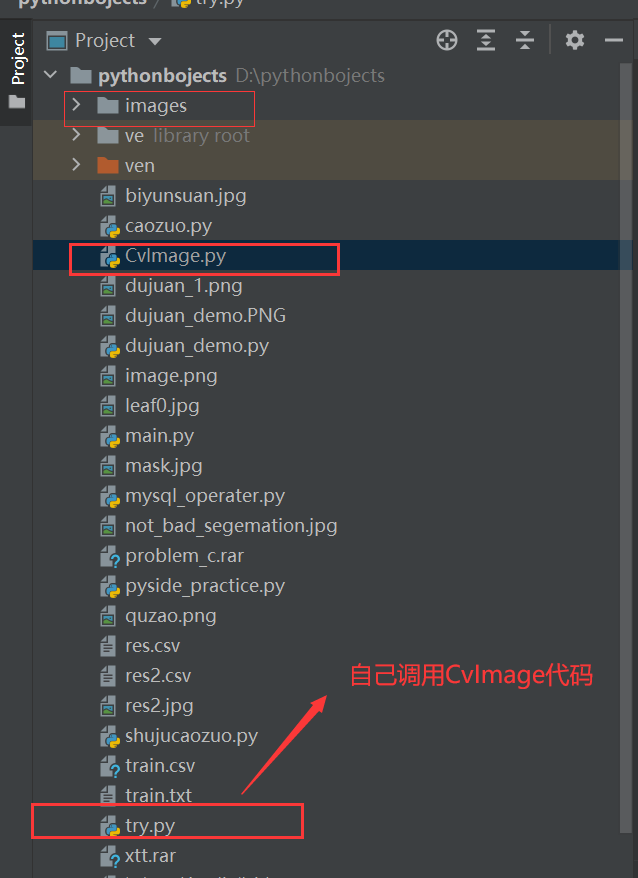

结果文件为res.csv

# 调用了自适应直方图均衡

In [ ]:
"""
Created on Sat Jan 23 11:31 2021
@author: xiaotingting
"""
import time, timeit
import math
from matplotlib import pyplot as plt
import cv2
import numpy as np
import os
import pandas as pd

__all__=['CvImage']
def clock(func):
    def clocked(*args):
        t0 = timeit.default_timer()
        result = func(*args)
        elapsed = timeit.default_timer() - t0
        name = func.__name__
        arg_str = ', '.join(repr(arg) for arg in args)
        print('[%0.8fs] %s(%s) -> %r' % (elapsed, name, arg_str, result))
        return result

    return clocked


def whole_hist(func):
    def whole_histed(*args):
        '''
        绘制整幅图像的直方图
        '''
        image = func(*args)
        plt.hist(image.ravel(), 256, [0, 256])  # numpy的ravel函数功能是将多维数组降为一维数组
        plt.show()
        return image

    return whole_histed


def show_img(func):
    def show_image(*args):
        image = func(*args)

        cv2.imshow('dst', image)
        if cv2.waitKey(0) & 0xff == 27:
            cv2.destroyAllWindows()
        return image

    return show_image


# def channel_hist(func):
#     def channel_histed(*args,**dicts):
#         '''
#         画三通道图像的直方图,出现了一个问题：写一个装饰器画三通道直方图，发现画一个通道是可以的，但是画三个就不允许了。指在一张图中绘制多条曲线，相同坐标轴。
#         '''
#         image=func(*args)
#         #print(image)
#         color = ('b', 'g', 'r')   #这里画笔颜色的值可以为大写或小写或只写首字母或大小写混合
#         hist=[1,2,3,4]
#         #for i1 , color1 in enumerate(color):
#         for i1 in range(3):
#             #enumerate()将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中
#             hist[i1] = cv2.calcHist([image], [i1], None, [256], [0, 256])  #计算直方图
#             #plt.plot(hist, color1)
# # 创建figure对象
#             fig = plt.figure() # 每调用一次plt.figure()函数就会创建一个新的显示窗口，与matlab中的figure类似
#             subplot = fig.add_subplot(2, 3, 1) # 2表示2行，3表示3列，1表示2行3列中的索引位置1
#             #subplot.xlim([0, 256])
#             subplot.imshow(hist[0])

#             subplot = fig.add_subplot(2, 3, 3) # 2表示2行，3表示3列，1表示2行3列中的索引位置3
#             #subplot.xlim([0, 256])
#             subplot.imshow(hist[1])

#             subplot = fig.add_subplot(2, 3, 6) # 2表示2行，3表示3列，1表示2行3列中的索引位置6
#             #subplot.xlim([0, 256])
#             subplot.imshow(hist[2])
#         return image
#     return channel_histed

class CvImage():
    def __init__(self, img_name, read_method=1, gray_method=3, fx=0.3, fy=0.3, num=1, gray_level=16):
        self.img_name = img_name
        self.read_method = read_method
        self.gray_method = gray_method
        self.fx = fx
        self.fy = fy
        self.img = self.load_image()
        self.ju = ["ju1", "ju2", "ju3", "ju4", "ju5", "ju6", "ju7", 'huidu1', 'huidu2', 'huidu3', 'huidu4', 'yanse1',
                   'yanse2', 'yanse3', 'yanse4', 'yanse5', 'yanse6', 'yanse7', 'yanse8', 'yanse9']  # 将列表a，b转换成字典
        self.data = pd.DataFrame(columns=self.ju)
        self.num = num
        self.gray_level = gray_level

    def load_image(self):
        pt = (os.getcwd() + '\\' + self.img_name)
        img = cv2.imread(pt, self.read_method)
        #         if img is None:
        #             raise Exception("Image is not found!", pt)
        #         return img
        return img

    def xiugai_chicun(self):
        img = self.img
        image = cv2.resize(img, dsize=None, fx=self.fx, fy=self.fy, interpolation=cv2.INTER_AREA)
        self.img = image
        return image

    def image_to_gray1(self):
        img = self.img
        grayimg = np.zeros(img.shape, np.uint8)
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                grayimg[i, j] = max(image[i, j][0], image[i, j][1], image[i, j][2])
        return grayimg

    def image_to_gray2(self):
        image = self.img
        # 最大值法
        h, w = image.shape[:2]
        grayimg = np.zeros((h, w), dtype=np.uint8)  # 创建一个h行w列的二维list
        for i in range(h):
            for j in range(w):
                grayimg[i, j] = (int(image[i, j][0]) + int(image[i, j][1]) + int(image[i, j][2])) / 3
        return grayimg

    def image_to_gray3(self):
        image = self.img
        h, w = image.shape[:2]
        grayimg = np.zeros((h, w), dtype=np.uint8)  # 创建一个h行w列的二维list
        for i in range(h):
            for j in range(w):
                # Y = 0．3R + 0．59G + 0．11B
                # 通过cv格式打开的图片，像素格式为 BGR
                grayimg[i, j] = 0.3 * image[i, j][2] + 0.11 * image[i, j][0] + 0.59 * image[i, j][1]
        return grayimg

    #     @whole_hist
    #     @show_img
    def zhongzhi_lvbo(self):
        img = self.load_image()
        img = cv2.medianBlur(img, 5)
        return img

    def image_to_gray(self):
        if self.gray_method in range(1, 4):
            if self.gray_method == 1:
                return self.image_to_gray1()
            elif self.gray_method == 2:
                return self.image_to_gray2()
            elif self.gray_method == 3:
                return self.image_to_gray2()
        else:
            raise Exception("Gray_method is not in 1,2,3!", gray_method)
    @show_img
    def zhifangtu_junhen(self):
        img = self.zhongzhi_lvbo()
        (R,G,B)=cv2.split(img)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        cl1 = clahe.apply(R)
        cl2 = clahe.apply(G)
        cl3 = clahe.apply(B)
        cl=cv2.merge([cl1,cl2,cl3])
        return cl

    @show_img
    def quchu_beijing(self):
        img = self.zhifangtu_junhen()  #################3
        HSV_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        hue = HSV_img[:, :, 0]
        lower_gray = np.array([1, 0, 0])
        upper_gray = np.array([99, 255, 255])  # 这就是双阈值
        mask = cv2.inRange(HSV_img, lower_gray, upper_gray)
        # Bitwise-AND mask and original image
        res2 = cv2.bitwise_and(img, img, mask=mask)  # 和模板进行与运算
        cv2.imwrite("res2.jpg", res2)
        self.img = res2
        return res2

    #     @show_img
    def bianyuan_chuli(self):
        self.quchu_beijing()
        res2 = cv2.cvtColor(self.img, cv2.COLOR_BGR2HSV)
        ret1, thresh1 = cv2.threshold(res2, 0, 255, cv2.THRESH_BINARY)
        cv2.imwrite("mask.jpg", thresh1)
        kernel = np.ones((10, 10), np.uint8)  # 矩形结构

        erosion = cv2.erode(thresh1, kernel)  # 腐蚀
        dilation = cv2.dilate(thresh1, kernel)  # 膨胀

        kernel_1 = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))
        opening = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel_1)

        closing = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel_1)
        cv2.imwrite("biyunsuan.jpg", closing)
        (B, G, R) = cv2.split(self.img)
        mask = cv2.cvtColor(closing, cv2.COLOR_BGR2GRAY)
        and_img_B = cv2.bitwise_and(B, mask)
        and_img_G = cv2.bitwise_and(G, mask)
        and_img_R = cv2.bitwise_and(R, mask)
        zeros = np.zeros(res2.shape[:2], np.uint8)
        #         img_RGB=cv2.bitwise_and(closing,self.img)
        img_RGB = cv2.merge([and_img_R, and_img_G, and_img_B])
        cv2.imwrite("not_bad_segemation.jpg", img_RGB)
        img_BGR = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2BGR)  # 这个颜色空间转来转去的，要小心
        HSV_img = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2HSV)
        hue = HSV_img[:, :, 0]

        lower_gray = np.array([1, 0, 0])
        upper_gray = np.array([99, 255, 255])

        mask = cv2.inRange(HSV_img, lower_gray, upper_gray)
        # Bitwise-AND mask and original image
        result = cv2.bitwise_and(img_BGR, img_BGR, mask=mask)
        self.img = result
        return result

    def luokuo_fenge(self):
        gray = self.zhongzhi_lvbo()
        gray = np.float32(gray)
        dst = cv2.cornerHarris(gray, 2, 3, 0.04)
        dst = cv2.dilate(dst, None)
        ret, dst = cv2.threshold(dst, 0.01 * dst.max(), 255, 0)
        dst = np.uint8(dst)
        # find centroids
        # connectedComponentsWithStats(InputArray image, OutputArray labels, OutputArray stats,
        # OutputArray centroids, int connectivity=8, int ltype=CV_32S)
        ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
        # define the criteria to stop and refine the corners
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
        # Python: cv2.cornerSubPix(image, corners, winSize, zeroZone, criteria)
        # zeroZone – Half of the size of the dead region in the middle of the search zone
        # over which the summation in the formula below is not done. It is used sometimes
        # to avoid possible singularities of the autocorrelation matrix. The value of (-1,-1)
        # indicates that there is no such a size.
        # 返回值由角点坐标组成的一个数组（而非图像）
        corners = cv2.cornerSubPix(gray, np.float32(centroids), (5, 5), (-1, -1), criteria)
        # Now draw them
        res = np.hstack((centroids, corners))
        # np.int0 可以用来省略小数点后面的数字（非四㮼五入）。
        res = np.int0(res)
        img[res[:, 1], res[:, 0]] = [0, 0, 255]
        img[res[:, 3], res[:, 2]] = [0, 255, 0]
        cv2.imwrite('subpixel5.png', img)
        return img

    def bubianju(self):
        seg = self.bianyuan_chuli()
        seg_gray = cv2.cvtColor(seg, cv2.COLOR_BGR2GRAY)
        moments = cv2.moments(seg_gray)
        humoments = cv2.HuMoments(moments)
        humoments = np.log(np.abs(humoments))  # 同样建议取对数
        return humoments.ravel()

    def maxGrayLevel(self):
        img = cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)
        max_gray_level = 0
        (height, width) = img.shape
        print(height, width)
        for y in range(height):
            for x in range(width):
                if img[y][x] > max_gray_level:
                    max_gray_level = img[y][x]
        return max_gray_level + 1

    def getGlcm(self, input, d_x, d_y):
        srcdata = input.copy()
        ret = [[0.0 for i in range(self.gray_level)] for j in range(self.gray_level)]
        (height, width) = input.shape

        max_gray_level = self.maxGrayLevel()

        # 若灰度级数大于gray_level，则将图像的灰度级缩小至gray_level，减小灰度共生矩阵的大小
        if max_gray_level > self.gray_level:
            for j in range(height):
                for i in range(width):
                    srcdata[j][i] = srcdata[j][i] * self.gray_level / max_gray_level

        for j in range(height - d_y):
            for i in range(width - d_x):
                rows = srcdata[j][i]
                cols = srcdata[j + d_y][i + d_x]
                ret[rows][cols] += 1.0

        for i in range(self.gray_level):
            for j in range(self.gray_level):
                ret[i][j] /= float(height * width)

        return ret

    def feature_computer(self, p):
        Con = 0.0
        Eng = 0.0
        Asm = 0.0
        Idm = 0.0
        for i in range(self.gray_level):
            for j in range(self.gray_level):
                Con += (i - j) * (i - j) * p[i][j]
                Asm += p[i][j] * p[i][j]
                Idm += p[i][j] / (1 + (i - j) * (i - j))
                if p[i][j] > 0.0:
                    Eng += p[i][j] * math.log(p[i][j])
        # print(Asm,Con,-Eng,Idm)
        return [Asm, Con, -Eng, Idm]

    def test(self):
        img_gray = cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)

        glcm_0 = self.getGlcm(img_gray, 1, 0)

        asm, con, eng, idm = self.feature_computer(glcm_0)

        return [asm, con, eng, idm]

    def color_moments(self):
        # Convert BGR to HSV colorspace
        hsv = cv2.cvtColor(self.img, cv2.COLOR_BGR2HSV)
        # Split the channels - h,s,v
        h, s, v = cv2.split(hsv)
        # Initialize the color feature
        color_feature = []
        # N = h.shape[0] * h.shape[1]
        # The first central moment - average
        h_mean = np.mean(h)  # np.sum(h)/float(N)
        s_mean = np.mean(s)  # np.sum(s)/float(N)
        v_mean = np.mean(v)  # np.sum(v)/float(N)
        color_feature.extend([h_mean, s_mean, v_mean])
        # The second central moment - standard deviation
        h_std = np.std(h)  # np.sqrt(np.mean(abs(h - h.mean())**2))
        s_std = np.std(s)  # np.sqrt(np.mean(abs(s - s.mean())**2))
        v_std = np.std(v)  # np.sqrt(np.mean(abs(v - v.mean())**2))
        color_feature.extend([h_std, s_std, v_std])
        # The third central moment - the third root of the skewness
        h_skewness = np.mean(abs(h - h.mean()) ** 3)
        s_skewness = np.mean(abs(s - s.mean()) ** 3)
        v_skewness = np.mean(abs(v - v.mean()) ** 3)
        h_thirdMoment = h_skewness ** (1. / 3)
        s_thirdMoment = s_skewness ** (1. / 3)
        v_thirdMoment = v_skewness ** (1. / 3)
        color_feature.extend([h_thirdMoment, s_thirdMoment, v_thirdMoment])
        return color_feature

    @property
    def tiqu(self):
        res = list(self.bubianju())
        res.extend(self.test())
        res.extend(self.color_moments())
        self.data.loc[self.num] = res
        self.num = self.num + 1
        return res

    @property
    def zhuan_csv(self):
        self.data.to_csv('res.csv', encoding='gbk')
        return self.data

    @staticmethod
    def image_chazhi(*args, **dicts):
        '''
        在图像经过空间位置变换之后，需要求取在新平面的新排列的各点像素的位置，其并不会改变映射前后的像素的像素值。
        '''
        pass

    @staticmethod
    def duqu():
        res0 = []
        for i in range(100000):
            print(i)
            filename = 'IMG_{0:03d}.jpg'.format(i)
            print(filename)
            img0 = CvImage(filename)
            if img0.load_image() is None:
                break
            res = img0.tiqu
            res0.append(res)
        ju = ["ju1", "ju2", "ju3", "ju4", "ju5", "ju6", "ju7", 'huidu1', 'huidu2', 'huidu3', 'huidu4', 'yanse1',
              'yanse2', 'yanse3', 'yanse4', 'yanse5', 'yanse6', 'yanse7', 'yanse8', 'yanse9']  # 将列表a，b转换成字典
        data = pd.DataFrame(res0, columns=ju)
        data.to_csv('res.csv')
if __name__=='__main__':
    image0=CvImage('leaf0.jpg')
    image0.tiqu